In [11]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#import datasets
cbon = pd.read_csv('carbon-emissions.csv')
tport = pd.read_csv('transportation.csv')
#print(cbon.head())
#print(tport.head())

In [13]:
#filter to Unlinked Passenger Trips & Vehicle Revenue Miles
tport = tport[['State', 'Unlinked Passenger Trips', 'Vehicle Revenue Miles']]
tport

,State,Unlinked Passenger Trips,Vehicle Revenue Miles
0,WY,1058371,853424
1,WY,5465,22516
2,WY,57879,112285
3,WY,591630,229595
4,WY,20125,66386
...,...,...,...
3693,NE,75,6946
3694,FL,37222,44228
3695,KS,7285,11051
3696,MA,12711,39060


In [14]:
#merge state values
tport = tport.groupby('State')['Unlinked Passenger Trips', 'Vehicle Revenue Miles'].sum()
tport

C:\Users\gemki\AppData\Local\Temp\ipykernel_37836\3518366633.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tport = tport.groupby('State')['Unlinked Passenger Trips', 'Vehicle Revenue Miles'].sum()


,Unlinked Passenger Trips,Vehicle Revenue Miles
State,,
AK,6106877,9265669
AL,8249880,17633916
AR,5897907,18196673
AS,26358,147007
AZ,92021411,76311667
CA,1293074046,690837942
CO,132727049,95281540
CT,41563525,35552797
DC,357138958,142826631


In [15]:
#merge datasets (2018)
full_df = tport.merge(cbon, on='State')
full_df = full_df[['State', 'Unlinked Passenger Trips', 'Vehicle Revenue Miles', '2018']]
full_df.rename(columns = {'2018' : 'Carbon Emissions (Metric Tons)'}, inplace = True)
full_df

,State,Unlinked Passenger Trips,Vehicle Revenue Miles,Carbon Emissions (Metric Tons)
0,AK,6106877,9265669,34514589
1,AL,8249880,17633916,112355471
2,AR,5897907,18196673,70786146
3,AZ,92021411,76311667,94095509
4,CA,1293074046,690837942,358594718
5,CO,132727049,95281540,90061689
6,CT,41563525,35552797,37384241
7,DC,357138958,142826631,2856068
8,DE,8096943,16253314,13989310
9,FL,227424998,226671427,242009113


In [17]:
#get MT carbon emissions per VRM
EpVRM = []
for i in range (51):
    VRM = full_df._get_value(i, 'Vehicle Revenue Miles')
    CE = full_df._get_value(i, 'Carbon Emissions (Metric Tons)')
    val = float(CE)/float(VRM)
    EpVRM.append(val)
print(EpVRM)

full_df['Carbon Emissions per Vehicle Revenue Mile'] = EpVRM
full_df

[3.7249969753937897, 6.371555302860692, 3.890059792798387, 1.2330422424136012, 0.5190721241538294, 0.9452165550640764, 1.0515133591317725, 0.01999674696520707, 0.8607050845138413, 1.067664840703544, 1.4439061280739245, 0.6004016890922522, 2.7906303483302577, 2.2527557950365167, 0.7509280712874782, 4.370569528941831, 3.8869152422127686, 2.2452193824497697, 7.4518611187992, 0.4811487151962928, 0.6437540681871555, 0.7876507662444098, 1.514189766714208, 1.0696504565986982, 1.9215797085743838, 4.103548983534478, 4.113396450747559, 1.2663936328667111, 8.94568740041669, 4.728168091017061, 1.9883550576382478, 0.45976373870208426, 2.7338428161868333, 1.0560044531604138, 0.23052597845307557, 2.0333285038134394, 3.392825217324689, 0.5846223674743543, 1.166703075488668, 0.9360702068486405, 3.6801401105410685, 2.1266437006242533, 1.6579001032839664, 2.4614437980335078, 1.4250126346013723, 1.372437372246076, 0.3164352522496422, 0.4487642291569887, 1.9228607842434415, 7.155173428171871, 16.9780513638

,State,Unlinked Passenger Trips,Vehicle Revenue Miles,Carbon Emissions (Metric Tons),Carbon Emissions per Vehicle Revenue Mile
0,AK,6106877,9265669,34514589,3.724997
1,AL,8249880,17633916,112355471,6.371555
2,AR,5897907,18196673,70786146,3.890060
3,AZ,92021411,76311667,94095509,1.233042
4,CA,1293074046,690837942,358594718,0.519072
5,CO,132727049,95281540,90061689,0.945217
6,CT,41563525,35552797,37384241,1.051513
7,DC,357138958,142826631,2856068,0.019997
8,DE,8096943,16253314,13989310,0.860705
9,FL,227424998,226671427,242009113,1.067665


In [24]:
#sort dataframe by CEpVRM
full_df = full_df.sort_values('Carbon Emissions per Vehicle Revenue Mile')

<BarContainer object of 51 artists>

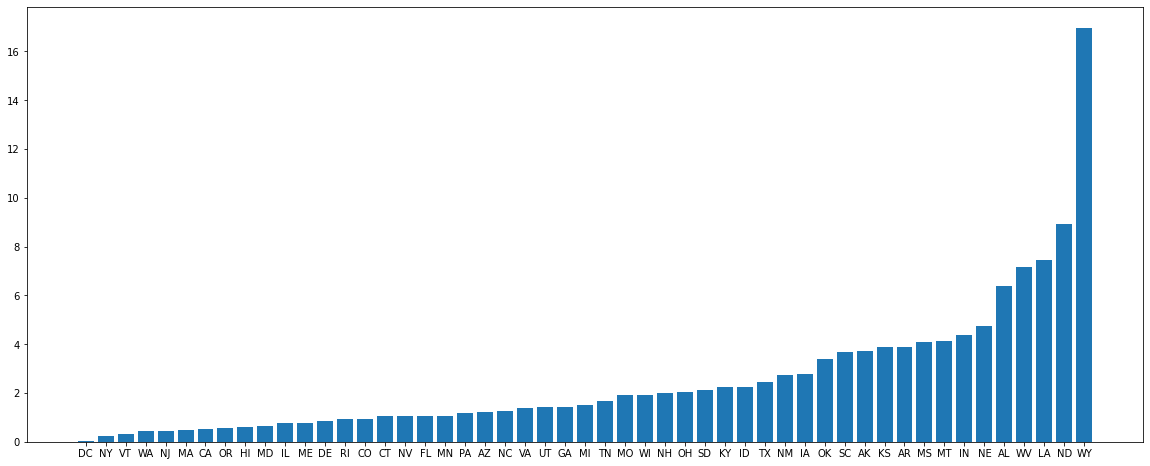

In [29]:
#plot CEpVRM by State
states = full_df['State'].to_list()
vals = full_df['Carbon Emissions per Vehicle Revenue Mile'].to_list()
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
axs.bar(states, vals)